# Assignment 3(due on 11/22)

## Student:宋雨璇（12332310），Gtihub：zai-song


## 得分：10/60

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## 1. Niño 3.4 index

In [4]:
data = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
# 获取SST数据
sst = data.variables["sst"]
# 定义Niño 3.4区域的经纬度范围
lat_range = slice(5, -5)   # 纬度范围：5N-5S
lon_range = slice(190, 240)   # 经度范围：170W-120W

# 计算Niño 3.4区域每个月的平均值（月平均）
monthly_mean = np.mean(sst[:, lat_range, lon_range])
# 计算SST时间序列与每月平均值的差异（异常值）
anomalies = sst[:, lat_range, lon_range] - monthly_mean[:, np.newaxis, np.newaxis]
# 可视化计算得到的Niño 3.4指数
plt.plot(anomalies.flatten())
plt.xlabel('Time (months)')
plt.ylabel('Niño 3.4 anomalies (°C)')
plt.title('Niño 3.4 Index')
plt.grid(True)
plt.show()

IndexError: too many indices

### 第一题代码无法正常运行，数据筛选正确

### 得分：5/20
### --------------------------------------------------------------------------------------------

## 2. Earth’s energy budget

## 2.1Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

Text(0.5, 1.0, 'TOA Net Flux')

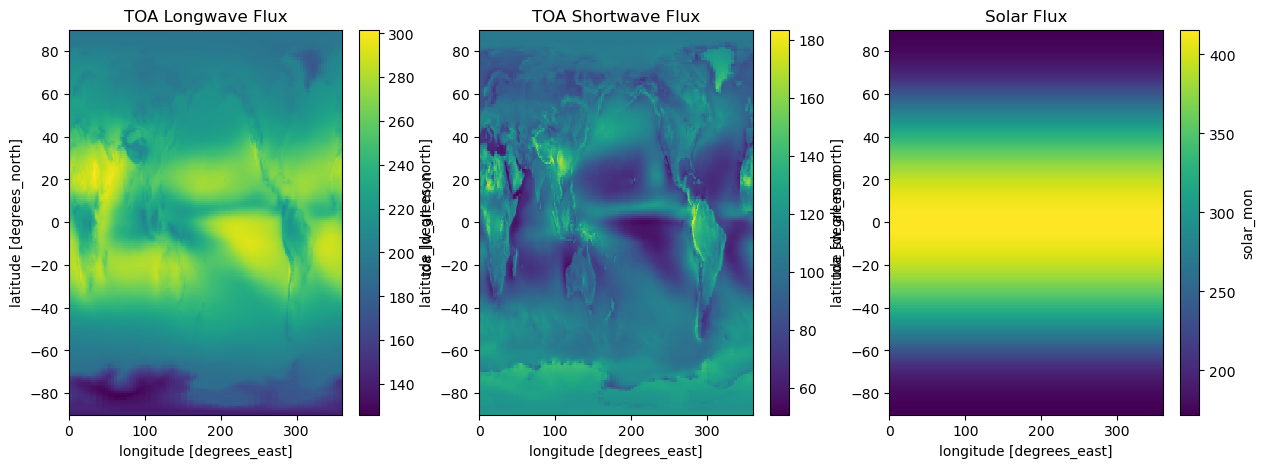

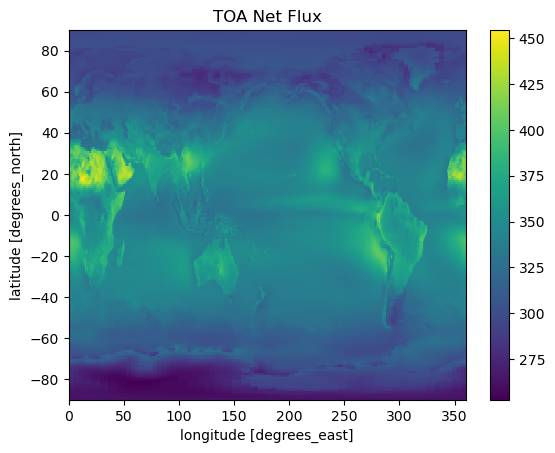

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data2 = xr.open_dataset('../CERES_EBAF-TOA_200003-201701.nc')

toa_lw_flux = data2['toa_lw_all_mon'].mean(dim='time')
toa_sw_flux = data2['toa_sw_all_mon'].mean(dim='time')
solar_flux = data2['solar_mon'].mean(dim='time')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
toa_lw_flux.plot(ax=axes[0])
axes[0].set_title('TOA Longwave Flux')
toa_sw_flux.plot(ax=axes[1])
axes[1].set_title('TOA Shortwave Flux')
solar_flux.plot(ax=axes[2])
axes[2].set_title('Solar Flux')

net_flux = toa_sw_flux + toa_lw_flux
fig, ax = plt.subplots()
net_flux.plot(ax=ax)
ax.set_title('TOA Net Flux')

In [6]:
incoming_sw_flux = solar_flux
outgoing_lw_flux = toa_lw_flux
outgoing_sw_flux = toa_sw_flux

Text(0.5, 1.0, 'Outgoing Shortwave Flux')

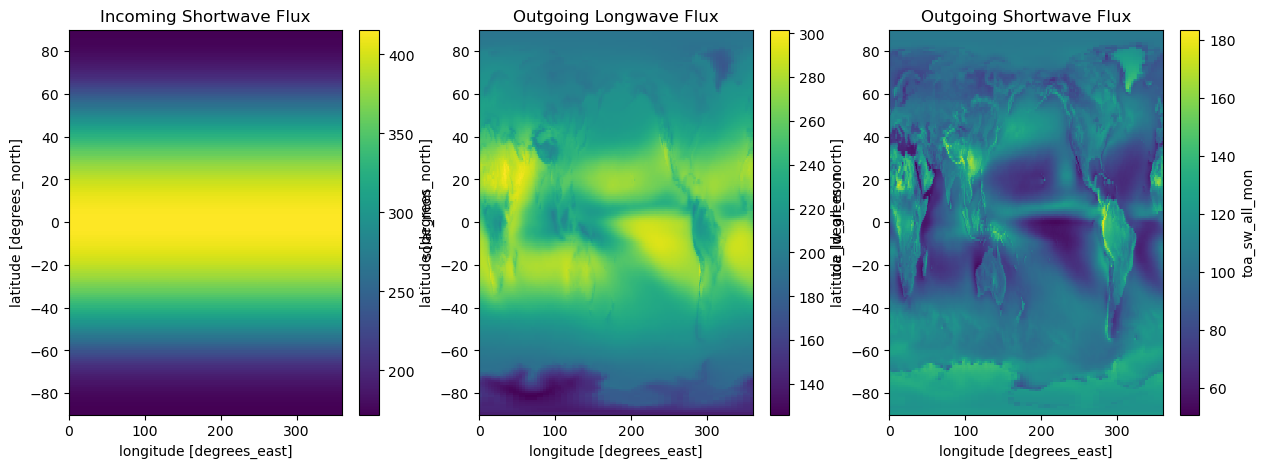

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
incoming_sw_flux.plot(ax=axes[0])
axes[0].set_title('Incoming Shortwave Flux')
outgoing_lw_flux.plot(ax=axes[1])
axes[1].set_title('Outgoing Longwave Flux')
outgoing_sw_flux.plot(ax=axes[2])
axes[2].set_title('Outgoing Shortwave Flux')

Text(0.5, 1.0, 'Net Flux by Latitude Bands')

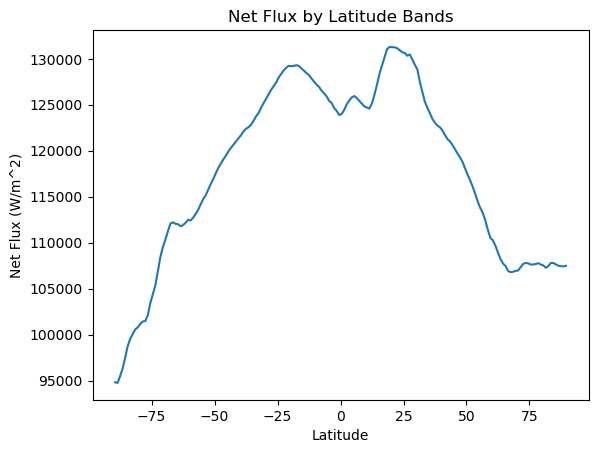

In [8]:
lat_bands = np.arange(-90, 91, 1)
net_flux_lat = net_flux.groupby_bins('lat', lat_bands).mean(dim='lat').sum(dim='lon')
fig, ax = plt.subplots()
net_flux_lat.plot(ax=ax)
ax.set_xlabel('Latitude')
ax.set_ylabel('Net Flux (W/m^2)')
ax.set_title('Net Flux by Latitude Bands')

In [10]:
low_cloud_fraction = data2['toa_lw_clr_mon']
high_cloud_fraction = data2['toa_sw_clr_mon']
outgoing_lw_low = (toa_lw_flux * low_cloud_fraction).mean(dim='time')
outgoing_lw_high = (toa_lw_flux * high_cloud_fraction).mean(dim='time')
outgoing_sw_low = (toa_sw_flux * low_cloud_fraction).mean(dim='time')
outgoing_sw_high = (toa_sw_flux * high_cloud_fraction).mean(dim='time')

Text(0.5, 1.0, 'Outgoing Shortwave Flux (High Clouds)')

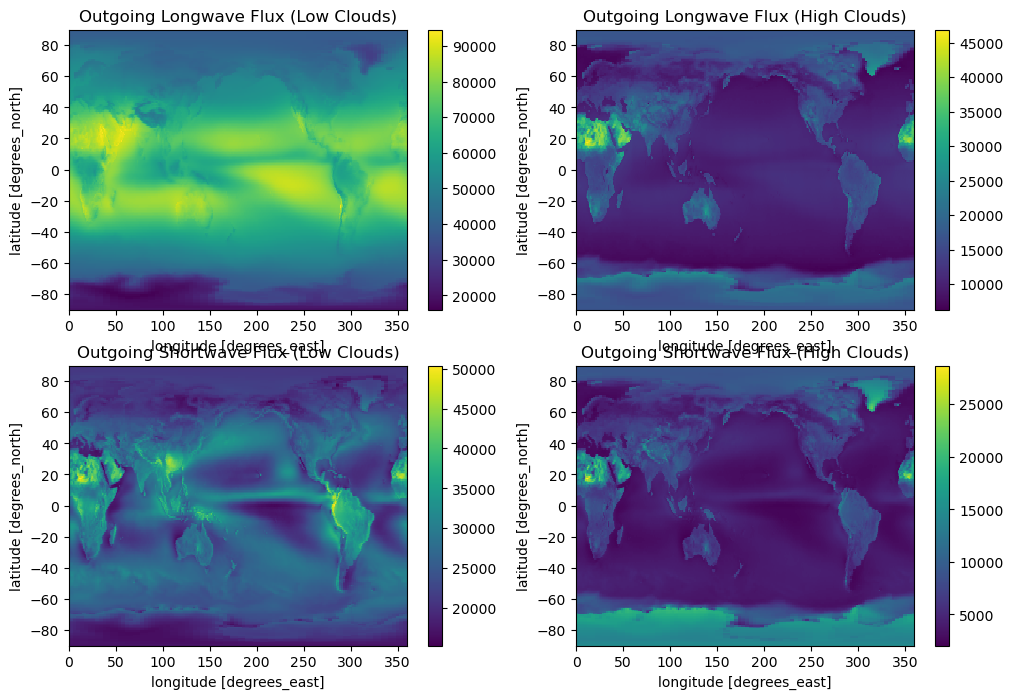

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
outgoing_lw_low.plot(ax=axes[0, 0])
axes[0, 0].set_title('Outgoing Longwave Flux (Low Clouds)')
outgoing_lw_high.plot(ax=axes[0, 1])
axes[0, 1].set_title('Outgoing Longwave Flux (High Clouds)')
outgoing_sw_low.plot(ax=axes[1, 0])
axes[1, 0].set_title('Outgoing Shortwave Flux (Low Clouds)')
outgoing_sw_high.plot(ax=axes[1, 1])
axes[1, 1].set_title('Outgoing Shortwave Flux (High Clouds)')

In [12]:

global_mean_outgoing_lw_low = outgoing_lw_low.mean()
global_mean_outgoing_lw_high = outgoing_lw_high.mean()
global_mean_outgoing_sw_low = outgoing_sw_low.mean()
global_mean_outgoing_sw_high = outgoing_sw_high.mean()

In [13]:

print("低云区出射短波辐射全球平均值：", global_mean_outgoing_sw_low)
print("低云区出射长波辐射全球平均值：", global_mean_outgoing_lw_low)
print("高云区出射短波辐射全球平均值：", global_mean_outgoing_sw_high)
print("高云区出射长波辐射全球平均值：", global_mean_outgoing_lw_high)

低云区出射短波辐射全球平均值： <xarray.DataArray ()>
array(25035.318, dtype=float32)
低云区出射长波辐射全球平均值： <xarray.DataArray ()>
array(57374.293, dtype=float32)
高云区出射短波辐射全球平均值： <xarray.DataArray ()>
array(6655.379, dtype=float32)
高云区出射长波辐射全球平均值： <xarray.DataArray ()>
array(13325.728, dtype=float32)


### 第二题代码运行正常，可以输出部分正确结果和图片；第一问应该用入射太阳光减去长波短波与原数据进行比对，第二年问未计算，第三问应计算排放总量，第四问未筛选，第五问没有筛选数据
### 得分：5/30

# 3.Explore a netCDF dataset

### 第三题未作答
### 得分：0/10
### --------------------------------------------------------------------------------------------